<a href="https://colab.research.google.com/github/madhulikag/BanaNET/blob/main/Bananutrient_binary_class_EfficientNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import libraries
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2, MobileNetV3Large
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications.mobilenet_v3 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models, Model
from tensorflow.keras.layers import Input, Dense, GlobalAveragePooling2D, Dropout, Conv2D, DepthwiseConv2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.applications import EfficientNetB3
from tensorflow.keras.applications.efficientnet import preprocess_input
from PIL import Image


import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

In [9]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
# Image directory, change to yours as needed
data_dir = '/content/drive/MyDrive/Banana_leaf_binary'

image_size = (300, 300)
batch_size = 32

In [11]:
# Data Processing for unorganized directory
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode = 'categorical',
    subset = 'training'
)

val_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode = 'categorical',
    subset = 'validation',
    shuffle = False
)

Found 1432 images belonging to 2 classes.
Found 358 images belonging to 2 classes.


In [12]:
base_model = EfficientNetB3(
    include_top=False,
    weights='imagenet',
    input_shape=(300, 300, 3)  # EfficientNetB3 expects 300x300
)
base_model.trainable = False  # Freeze initially

In [13]:
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,        # Reduce LR by 50%
    patience=2,        # Wait 2 epochs before reducing
    min_lr=1e-6,       # Don't go below this LR
    verbose=1
)

In [14]:
model = Sequential([
    Input(shape=(300, 300, 3)),
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(2, activation='softmax')  # change to match your number of classes
])
model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [15]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=30,
    callbacks=[reduce_lr, early_stop, checkpoint]
)

Epoch 1/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 10s/step - accuracy: 0.6743 - loss: 0.5900 

45/45 ━━━━━━━━━━━━━━━━━━━━ 638s 14s/step - accuracy: 0.6759 - loss: 0.5883 - val_accuracy: 0.8547 - val_loss: 0.3895 - learning_rate: 1.0000e-04
Epoch 2/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.8395 - loss: 0.3918

45/45 ━━━━━━━━━━━━━━━━━━━━ 295s 7s/step - accuracy: 0.8393 - loss: 0.3915 - val_accuracy: 0.8771 - val_loss: 0.3099 - learning_rate: 1.0000e-04
Epoch 3/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.8838 - loss: 0.3107

45/45 ━━━━━━━━━━━━━━━━━━━━ 288s 6s/step - accuracy: 0.8838 - loss: 0.3105 - val_accuracy: 0.8771 - val_loss: 0.2733 - learning_rate: 1.0000e-04
Epoch 4/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.8943 - loss: 0.2755

45/45 ━━━━━━━━━━━━━━━━━━━━ 299s 7s/step - accuracy: 0.8942 - loss: 0.2755 - val_accuracy: 0.9050 - val_loss: 0.2485 - learning_rate: 1.0000e-04
Epoch 5/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.9206 - loss: 0.2533

45/45 ━━━━━━━━━━━━━━━━━━━━ 320s 7s/step - accuracy: 0.9207 - loss: 0.2528 - val_accuracy: 0.8939 - val_loss: 0.2394 - learning_rate: 1.0000e-04
Epoch 6/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.9064 - loss: 0.2184

45/45 ━━━━━━━━━━━━━━━━━━━━ 299s 7s/step - accuracy: 0.9067 - loss: 0.2182 - val_accuracy: 0.9050 - val_loss: 0.2240 - learning_rate: 1.0000e-04
Epoch 7/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.9389 - loss: 0.1781

45/45 ━━━━━━━━━━━━━━━━━━━━ 309s 7s/step - accuracy: 0.9388 - loss: 0.1784 - val_accuracy: 0.9050 - val_loss: 0.2188 - learning_rate: 1.0000e-04
Epoch 8/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 292s 7s/step - accuracy: 0.9281 - loss: 0.1988 - val_accuracy: 0.9050 - val_loss: 0.2209 - learning_rate: 1.0000e-04
Epoch 9/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.9466 - loss: 0.1699
Epoch 9: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.
45/45 ━━━━━━━━━━━━━━━━━━━━ 294s 7s/step - accuracy: 0.9466 - loss: 0.1700 - val_accuracy: 0.8966 - val_loss: 0.2258 - learning_rate: 1.0000e-04
Epoch 10/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.9436 - loss: 0.1621

45/45 ━━━━━━━━━━━━━━━━━━━━ 296s 7s/step - accuracy: 0.9436 - loss: 0.1621 - val_accuracy: 0.9106 - val_loss: 0.2111 - learning_rate: 5.0000e-05
Epoch 11/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 285s 6s/step - accuracy: 0.9538 - loss: 0.1579 - val_accuracy: 0.9078 - val_loss: 0.2117 - learning_rate: 5.0000e-05
Epoch 12/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.9474 - loss: 0.1540
Epoch 12: ReduceLROnPlateau reducing learning rate to 2.499999936844688e-05.
45/45 ━━━━━━━━━━━━━━━━━━━━ 289s 6s/step - accuracy: 0.9474 - loss: 0.1539 - val_accuracy: 0.9022 - val_loss: 0.2139 - learning_rate: 5.0000e-05
Epoch 13/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.9600 - loss: 0.1382

45/45 ━━━━━━━━━━━━━━━━━━━━ 289s 6s/step - accuracy: 0.9599 - loss: 0.1384 - val_accuracy: 0.9078 - val_loss: 0.2060 - learning_rate: 2.5000e-05
Epoch 14/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 281s 6s/step - accuracy: 0.9493 - loss: 0.1399 - val_accuracy: 0.9078 - val_loss: 0.2085 - learning_rate: 2.5000e-05
Epoch 15/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.9578 - loss: 0.1290

45/45 ━━━━━━━━━━━━━━━━━━━━ 329s 6s/step - accuracy: 0.9578 - loss: 0.1291 - val_accuracy: 0.9078 - val_loss: 0.2029 - learning_rate: 2.5000e-05
Epoch 16/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 334s 7s/step - accuracy: 0.9623 - loss: 0.1364 - val_accuracy: 0.9022 - val_loss: 0.2084 - learning_rate: 2.5000e-05
Epoch 17/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.9513 - loss: 0.1381
Epoch 17: ReduceLROnPlateau reducing learning rate to 1.249999968422344e-05.
45/45 ━━━━━━━━━━━━━━━━━━━━ 294s 7s/step - accuracy: 0.9514 - loss: 0.1380 - val_accuracy: 0.9050 - val_loss: 0.2066 - learning_rate: 2.5000e-05
Epoch 18/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.9607 - loss: 0.1466

45/45 ━━━━━━━━━━━━━━━━━━━━ 329s 7s/step - accuracy: 0.9608 - loss: 0.1463 - val_accuracy: 0.9050 - val_loss: 0.2028 - learning_rate: 1.2500e-05
Epoch 19/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.9633 - loss: 0.1378

45/45 ━━━━━━━━━━━━━━━━━━━━ 319s 7s/step - accuracy: 0.9632 - loss: 0.1377 - val_accuracy: 0.9078 - val_loss: 0.2007 - learning_rate: 1.2500e-05
Epoch 20/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 302s 7s/step - accuracy: 0.9511 - loss: 0.1428 - val_accuracy: 0.9050 - val_loss: 0.2038 - learning_rate: 1.2500e-05
Epoch 21/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.9524 - loss: 0.1415
Epoch 21: ReduceLROnPlateau reducing learning rate to 6.24999984211172e-06.
45/45 ━━━━━━━━━━━━━━━━━━━━ 293s 7s/step - accuracy: 0.9525 - loss: 0.1414 - val_accuracy: 0.9078 - val_loss: 0.2032 - learning_rate: 1.2500e-05
Epoch 22/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 305s 7s/step - accuracy: 0.9604 - loss: 0.1223 - val_accuracy: 0.9078 - val_loss: 0.2009 - learning_rate: 6.2500e-06


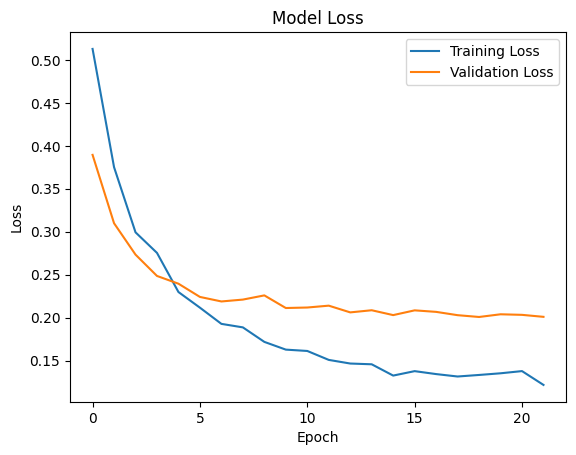

In [16]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [17]:
# Predict probabilities
y_pred_probs = model.predict(val_generator)

# Convert probabilities to class labels
y_pred = np.argmax(y_pred_probs, axis=1)

# True labels from the generator
y_true = val_generator.classes

12/12 ━━━━━━━━━━━━━━━━━━━━ 66s 5s/step


In [19]:
from sklearn.metrics import classification_report
# Generate classification report with class names
class_labels = list(val_generator.class_indices.keys())

print(classification_report(y_true, y_pred, target_names=class_labels))

              precision    recall  f1-score   support

     healthy       0.87      0.98      0.92       190
   potassium       0.97      0.83      0.89       168

    accuracy                           0.91       358
   macro avg       0.92      0.90      0.91       358
weighted avg       0.92      0.91      0.91       358



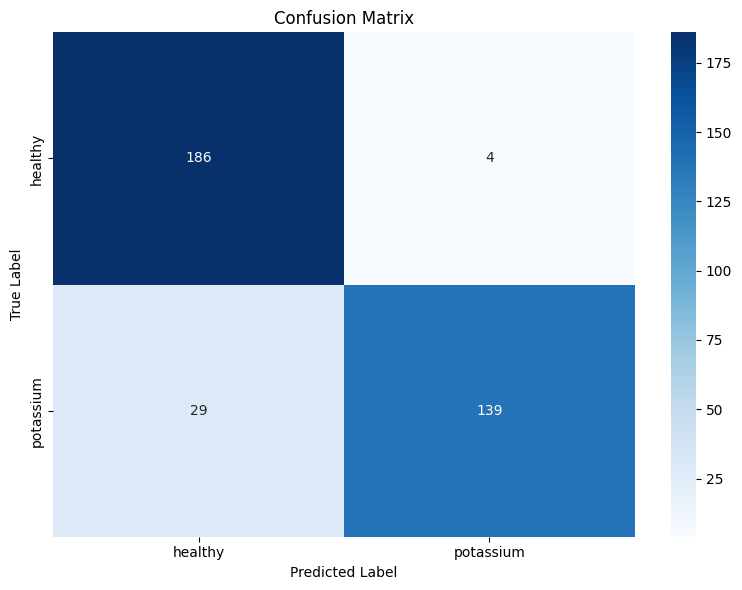

In [21]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred)

# Generate Confusion matrix with class names
class_labels = list(val_generator.class_indices.keys())

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels,
            yticklabels=class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()